<a href="https://colab.research.google.com/github/SriPradi/MyML/blob/master/Chest_Xray_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Mounting on gdrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [32]:
# Input API login details
import os
os.environ['KAGGLE_USERNAME']= "learn123dl"
os.environ['KAGGLE_KEY']= "b979921b6d84ab869c2d918f57506e20"

In [ ]:
# Download Kaggle dataset; mention the dataset URL after '-d' 
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p gdrive/MyDrive 

100% 2.29G/2.29G [00:18<00:00, 163MB/s]
100% 2.29G/2.29G [00:18<00:00, 131MB/s]


In [43]:
# To list the contents of the directory
!ls /content/gdrive/'My Drive'/

 AV_groundTruth
 AV_groundTruth.zip
 BeijingDataset.xlsx
 chest-xray-masks-and-labels.zip
 chest-xray-pneumonia.zip
 classification1.ipynb
'Colab Notebooks'
 Covariance.ipynb
 Demo1
 DRIVE
 hello-data
 Hourly_data_2018-2021.xlsx
 PM2.5-correlation.xlsx
'SPARC Workshop - AI in Health Sector .gform'
'SPARC Workshop - AI in Health Sector  (Responses).gsheet'
 Untitled0.ipynb
 WholeEyeClassifier
 WorkShop-Demo.ipynb


In [34]:
# To unzip the specified file in the current working directory
from zipfile import ZipFile
file_name ='/content/gdrive/MyDrive/chest-xray-pneumonia.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [35]:
# To know the current working directory
import os
print(os.getcwd())

/content


In [36]:
#Importing the relevant libraries
import tensorflow as tf
import numpy as np
import cv2


In [87]:
# Define the directory where the images are stored
data_dir = '/content/chest_xray/val/NORMAL'

In [41]:
# Define the labels for the two classes
class_names = ['NORMAL', 'PNEUMONIA']

In [47]:
#Importing relevant libraries
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.svm import SVC

In [48]:
# Define the image size and number of classes
IMG_SIZE = 224
NUM_CLASSES = 2

(-0.5, 1775.5, 1415.5, -0.5)

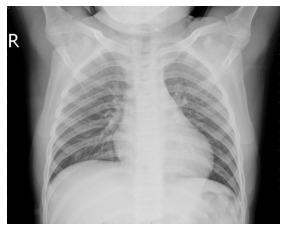

In [67]:
# To display image
import matplotlib.pyplot as plt
img=cv2.imread('/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert color space from BGR to RGB
plt.imshow(img)
plt.axis("off")

In [102]:
# Load the pre-trained CNN model
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

94765736/94765736 [==============================] - 1s 0us/step


In [104]:
# Extract features from the training data using the pre-trained model
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = datagen.flow_from_directory(
        '/content/chest_xray/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        shuffle=False)
train_features = base_model.predict(train_generator)

Found 5216 images belonging to 2 classes.
163/163 [==============================] - 1134s 7s/step


In [105]:
# Train an SVM model on the extracted features
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(train_features, train_generator.classes)

SVC(kernel='linear', probability=True, random_state=42)

In [106]:
# Extract features from the test data using the pre-trained model
test_generator = datagen.flow_from_directory(
        '/content/chest_xray/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        shuffle=False)
test_features = base_model.predict(test_generator)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 131s 6s/step


In [107]:
# Evaluate the SVM model on the test data
predictions = svm_model.predict(test_features)
accuracy = np.mean(predictions == test_generator.classes)
print('Accuracy:', accuracy)

Accuracy: 0.7644230769230769
